# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from dotenv import load_dotenv

# Import API key
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
open_weather_api_key = os.getenv("open_weather_api_key")
type(open_weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# initialize lists to hold data from api call
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={open_weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : ribeira grande
Processing Record 2 of Set 1 : banihal
Processing Record 3 of Set 1 : lokosovo
Processing Record 4 of Set 1 : kavieng
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : kapaa
Processing Record 7 of Set 1 : norman wells
Processing Record 8 of Set 1 : cockburn town
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : bathsheba
Processing Record 11 of Set 1 : georgetown
Processing Record 12 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : carnarvon
Processing Record 15 of Set 1 : reutte
Processing Record 16 of Set 1 : reynosa
Processing Record 17 of Set 1 : chokurdakh
City not found. Skipping...
Processing Record 18 of Set 1 : longyearbyen
Processing Record 19 of Set 1 : yerbogachen
Processing Record 20 of Set 1 : vagay
Processing Record 21 of Set 1 : barrow
Processing Record 22 o

Processing Record 37 of Set 4 : krasnoborsk
Processing Record 38 of Set 4 : mokhsogollokh
Processing Record 39 of Set 4 : kondinskoye
Processing Record 40 of Set 4 : pangnirtung
Processing Record 41 of Set 4 : yamada
Processing Record 42 of Set 4 : lazaro cardenas
Processing Record 43 of Set 4 : wiwili
Processing Record 44 of Set 4 : kamalpur
Processing Record 45 of Set 4 : lompoc
Processing Record 46 of Set 4 : lashio
Processing Record 47 of Set 4 : saskylakh
Processing Record 48 of Set 4 : katobu
Processing Record 49 of Set 4 : korla
Processing Record 50 of Set 4 : yumen
Processing Record 0 of Set 5 : hobart
Processing Record 1 of Set 5 : maraba
Processing Record 2 of Set 5 : bhandara
Processing Record 3 of Set 5 : vega de alatorre
Processing Record 4 of Set 5 : puerto ayora
City not found. Skipping...
Processing Record 5 of Set 5 : haines junction
Processing Record 6 of Set 5 : megion
Processing Record 7 of Set 5 : coffs harbour
City not found. Skipping...
Processing Record 8 of Set

Processing Record 22 of Set 8 : kaeo
Processing Record 23 of Set 8 : nata
Processing Record 24 of Set 8 : porosozero
City not found. Skipping...
Processing Record 25 of Set 8 : kloulklubed
Processing Record 26 of Set 8 : kon tum
Processing Record 27 of Set 8 : vilyuysk
Processing Record 28 of Set 8 : villablino
Processing Record 29 of Set 8 : jardim
Processing Record 30 of Set 8 : lusaka
Processing Record 31 of Set 8 : la ronge
Processing Record 32 of Set 8 : sechura
Processing Record 33 of Set 8 : corumba
Processing Record 34 of Set 8 : sao raimundo das mangabeiras
Processing Record 35 of Set 8 : slave lake
Processing Record 36 of Set 8 : road town
Processing Record 37 of Set 8 : homer
Processing Record 38 of Set 8 : cabo san lucas
Processing Record 39 of Set 8 : sarh
Processing Record 40 of Set 8 : hirado
Processing Record 41 of Set 8 : birjand
Processing Record 42 of Set 8 : omboue
Processing Record 43 of Set 8 : goderich
Processing Record 44 of Set 8 : hovd
Processing Record 45 of 

Processing Record 6 of Set 12 : batagay
Processing Record 7 of Set 12 : alyangula
Processing Record 8 of Set 12 : alta floresta
Processing Record 9 of Set 12 : sola
Processing Record 10 of Set 12 : kailua
Processing Record 11 of Set 12 : kirensk
Processing Record 12 of Set 12 : north myrtle beach
Processing Record 13 of Set 12 : chake chake
Processing Record 14 of Set 12 : dzilam gonzalez
Processing Record 15 of Set 12 : colares
Processing Record 16 of Set 12 : sao filipe
Processing Record 17 of Set 12 : port moresby
Processing Record 18 of Set 12 : liberty
Processing Record 19 of Set 12 : abu samrah
Processing Record 20 of Set 12 : dois vizinhos
Processing Record 21 of Set 12 : storforshei
Processing Record 22 of Set 12 : port hedland
Processing Record 23 of Set 12 : flinders
Processing Record 24 of Set 12 : thinadhoo
Processing Record 25 of Set 12 : bilma
Processing Record 26 of Set 12 : mayor pablo lagerenza
Processing Record 27 of Set 12 : antofagasta
Processing Record 28 of Set 12

In [39]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)
weather_dict.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ribeira Grande,100,PT,1629768955,91,38.5167,-28.7000,72.32,6.44
1,Banihāl,51,IN,1629768956,86,33.4167,75.2000,69.58,1.90
2,Lokosovo,8,RU,1629768956,64,61.1333,74.8167,70.74,8.86
3,Kavieng,100,PG,1629768957,89,-2.5744,150.7967,77.09,8.57
4,Vaini,20,TO,1629768957,83,-21.2000,-175.2000,73.56,17.27


In [44]:
# convert dictionary to dataframe and use .query to find cities with humidity > 99% 
weather_df = pd.DataFrame(weather_dict)
#weather_df.head()
humidity_df = weather_df.query('Humidity > 100')
humidity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

#### I found there are no cities with humidity > 100% 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

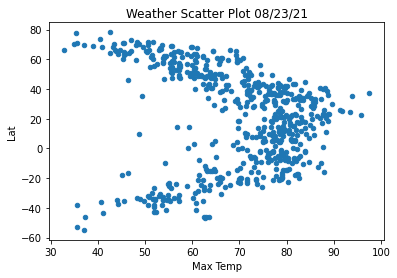

In [106]:
#Latitude vs Temperature

da= (time.strftime('Weather Scatter Plot %m/%d/%y'))        
weather_df.plot(kind='scatter',x='Max Temp', y='Lat',title=da )
pass


## Latitude vs. Humidity Plot

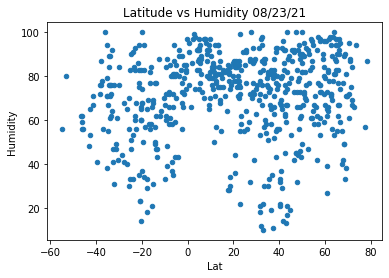

In [113]:
da=time.strftime('Latitude vs Humidity %m/%d/%y')
weather_df.columns
weather_df.plot(kind='scatter',x='Lat',y='Humidity',title=da)
pass

## Latitude vs. Cloudiness Plot

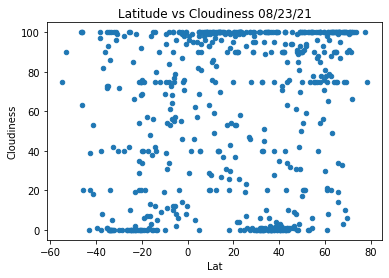

In [114]:
da=time.strftime('Latitude vs Cloudiness %m/%d/%y')
weather_df.plot(kind='scatter',x='Lat',y='Cloudiness',title = da)
pass

## Latitude vs. Wind Speed Plot

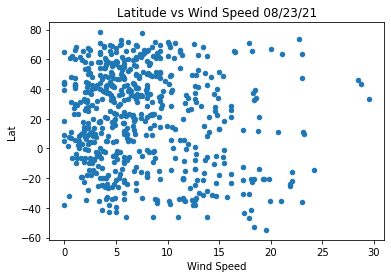

In [115]:
da=time.strftime('Latitude vs Wind Speed %m/%d/%y')
weather_df.plot(kind='scatter',x='Wind Speed',y='Lat',title=da)
pass

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


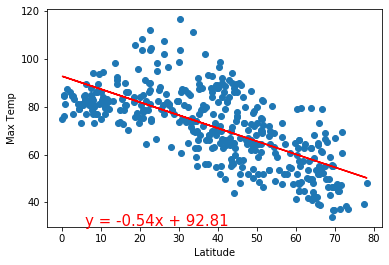

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


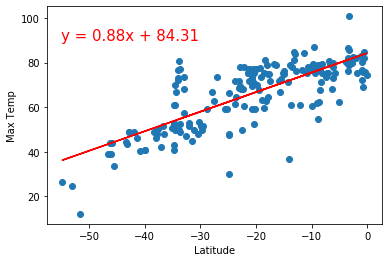

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


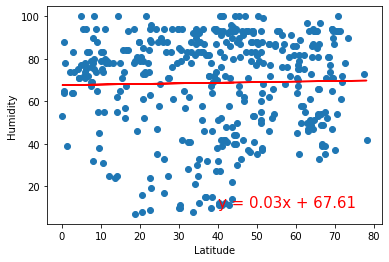

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


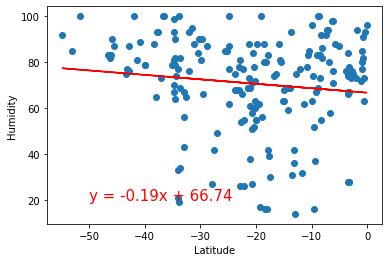

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


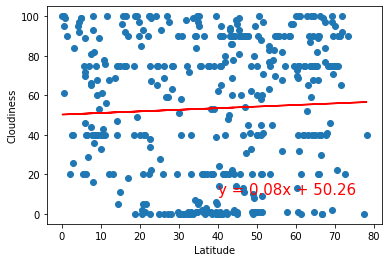

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


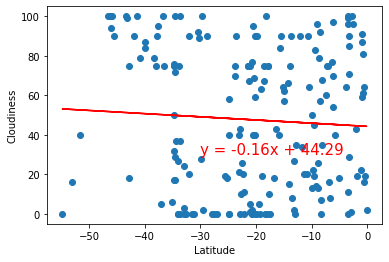

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


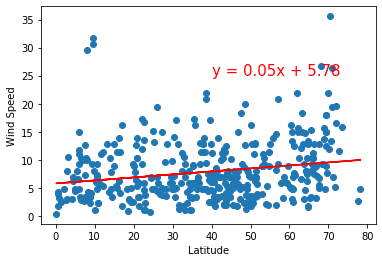

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


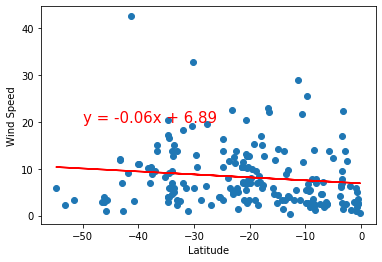